## 189 Final Project Video : Investigating Urban Land Expansion using Satellite Data
Authors: Emily Chen, Eric Pham, Zixun Zhang, Simai Chen, Tongxun Hu, Darren Liu

In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px
import pycountry_convert as pc

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

import ipywidgets as widgets
from ipywidgets import interact, fixed
%matplotlib inline

## 1) A statement of the problem you are addressing

Just two years ago, the Earth's global population reached a historic 8 billion people. Most of this unprecedented population growth was concentrated in urban areas, which, since 2016, have overtaken rural areas in terms of overall population. It is a clear trend that cities will hold more and more of the human population, so it is worthwhile to conduct an analysis into the environmental impact of the growth of cities, via satellite data.

We are seeking to build a model that can predict how much a city is slated to grow in area based mainly on the wealth/economic status and population of a city. Aside from population, data has shown that urban expansion is driven by different factors depending on the status of a city. Growth in cities that are in more developed countries tend to be driven largely by an increase in wealth, where as growth in cities that are in developing countries can be attributed almost exclusively to population growth.

## 2) Source of the data

We are using preprocessed satellite data from http://atlasofurbanexpansion.org/, a website dedicated to showing the growth of different urban areas around the world.

This data, which covers 200 cities globally, covers population growth over a set period, as well as the area of cities (in hectacres) over the same period.

1) Uploaded more data from Atlas of Urban Expansion under data tab: http://atlasofurbanexpansion.org/data

In [2]:
df = pd.read_csv('urban_expansion_with_long_lat.csv')
df.head()

,City Name,Country,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude
0,Accra,Ghana,Sub-Saharan Africa,5.615,-0.159,1/1/1991,2/1/2000,3/1/2014,"1,307,784","2,513,026","4,429,649",4.00%,"10,022","32,171","61,781",4.60%,5.557110,-0.201238
1,Addis Ababa,Ethiopia,Sub-Saharan Africa,9.001,38.756,1/1/1986,12/1/2000,12/1/2010,"1,445,701","2,276,356","3,009,130",2.80%,"7,531","11,713","21,133",5.90%,9.035829,38.752413
2,Ahmedabad,India,South and Central Asia,23.037,72.589,12/1/1989,10/1/2000,10/1/2013,"3,737,723","4,718,391","6,232,952",2.10%,"12,174","15,916","21,103",2.20%,23.021624,72.579707
3,Ahvaz,Iran,South and Central Asia,31.320,48.665,11/1/1991,9/1/2000,9/1/2013,"698,310","853,527","1,178,560",2.50%,"7,079","9,200","12,873",2.60%,31.323064,48.679320
4,Alexandria,Egypt,Western Asia and North Africa,31.152,29.884,10/1/1987,4/1/1999,7/1/2013,"2,558,891","3,132,780","4,345,193",2.30%,"7,818","15,514","22,782",2.70%,44.834953,8.745030


In [3]:
# https://stats.oecd.org/index.aspx?queryid=119047

df2 = pd.read_csv('city_gdp.csv')

df2.head()

,LOCATION,Country,TL,Territory level,GEO,Geography,VAR,Variable,TIME,Time,Value,Flag Codes,Flags
0,ESP,Spain,FUA,Functional Urban Area,ES002F,Barcelona,GDP_PW_REAL_PPP,"Labour productivity (GDP per worker in USD, co...",2001,2001,84103.0,NaN,NaN
1,ESP,Spain,FUA,Functional Urban Area,ES002F,Barcelona,GDP_PW_REAL_PPP,"Labour productivity (GDP per worker in USD, co...",2002,2002,85227.0,NaN,NaN
2,ESP,Spain,FUA,Functional Urban Area,ES002F,Barcelona,GDP_PW_REAL_PPP,"Labour productivity (GDP per worker in USD, co...",2003,2003,84631.0,NaN,NaN
3,ESP,Spain,FUA,Functional Urban Area,ES002F,Barcelona,GDP_PW_REAL_PPP,"Labour productivity (GDP per worker in USD, co...",2004,2004,83708.0,NaN,NaN
4,ESP,Spain,FUA,Functional Urban Area,ES002F,Barcelona,GDP_PW_REAL_PPP,"Labour productivity (GDP per worker in USD, co...",2005,2005,83278.0,NaN,NaN


## 3) Description of the data

In [4]:
# The basic structure and types of original data
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City Name                       200 non-null    object 
 1   Country                         200 non-null    object 
 2   Region                          200 non-null    object 
 3   CBD Latitude                    200 non-null    float64
 4   CBD Longitude                   200 non-null    float64
 5   Land CoverT1                    200 non-null    object 
 6   Land Cover T2                   200 non-null    object 
 7   Land Cover T3                   200 non-null    object 
 8   Population T1                   200 non-null    object 
 9   Population T2                   200 non-null    object 
 10  Population T3                   200 non-null    object 
 11  Population Annual Change T2-T3  200 non-null    object 
 12  Area T1 (ha)                    200 

In [5]:
# Check for missing values
print(df.isnull().sum())

City Name                         0
Country                           0
Region                            0
CBD Latitude                      0
CBD Longitude                     0
Land CoverT1                      0
Land Cover T2                     0
Land Cover T3                     0
Population T1                     0
Population T2                     0
Population T3                     0
Population Annual Change T2-T3    0
Area T1 (ha)                      0
Area T2 (ha)                      0
Area T3 (ha)                      0
Area Annual Change T2-T3          0
Longitude                         0
Latitude                          0
dtype: int64


In [6]:
# Check for duplicates
print(df.duplicated().sum())

0


In [7]:
# Add this to a separate word document for cleaner presentation.
# How many different cities?
len(df['City Name'].unique())

# How many different countries?
len(df['Country'].unique()) 

# How many different regions?
len(df['Region'].unique())

# What is the shape of the data?
df.shape

(200, 18)

## 4) Exploratory data analysis

In [8]:
# Convert population and area columns from strings to integers and remove commas
cols_to_convert = ['Population T1', 'Population T2', 'Population T3', 'Area T1 (ha)', 'Area T2 (ha)', 'Area T3 (ha)']
for col in cols_to_convert:
    df[col] = df[col].str.replace(',', '').astype(int)

In [9]:
# Convert the percentage change columns to floats
df['Population Annual Change T2-T3'] = df['Population Annual Change T2-T3'].str.rstrip('%').astype('float')
df['Area Annual Change T2-T3'] = df['Area Annual Change T2-T3'].str.rstrip('%').astype('float')

In [10]:
# Data types and basic statistics after conversion
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   City Name                       200 non-null    object 
 1   Country                         200 non-null    object 
 2   Region                          200 non-null    object 
 3   CBD Latitude                    200 non-null    float64
 4   CBD Longitude                   200 non-null    float64
 5   Land CoverT1                    200 non-null    object 
 6   Land Cover T2                   200 non-null    object 
 7   Land Cover T3                   200 non-null    object 
 8   Population T1                   200 non-null    int32  
 9   Population T2                   200 non-null    int32  
 10  Population T3                   200 non-null    int32  
 11  Population Annual Change T2-T3  200 non-null    float64
 12  Area T1 (ha)                    200 

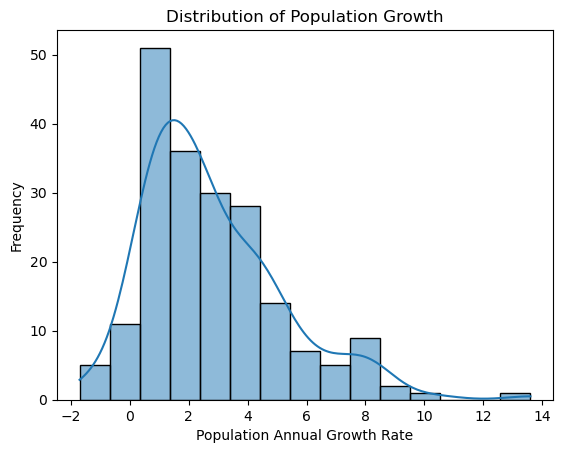

In [11]:
# Distribution of population growth
sns.histplot(df['Population Annual Change T2-T3'], kde=True)
plt.title('Distribution of Population Growth')
plt.xlabel('Population Annual Growth Rate')
plt.ylabel('Frequency')
plt.show()

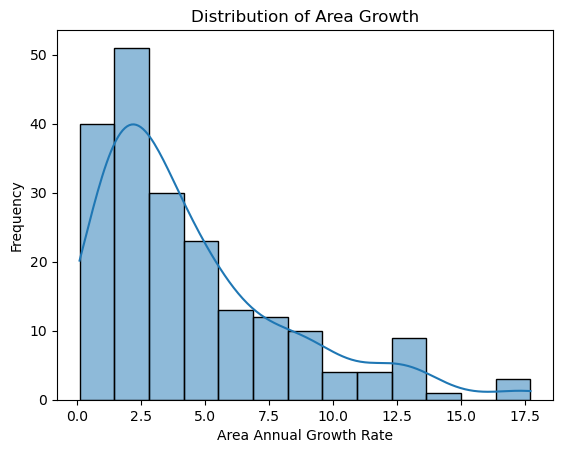

In [12]:
# Distribution of area growth
sns.histplot(df['Area Annual Change T2-T3'], kde=True)
plt.title('Distribution of Area Growth')
plt.xlabel('Area Annual Growth Rate')
plt.ylabel('Frequency')
plt.show()

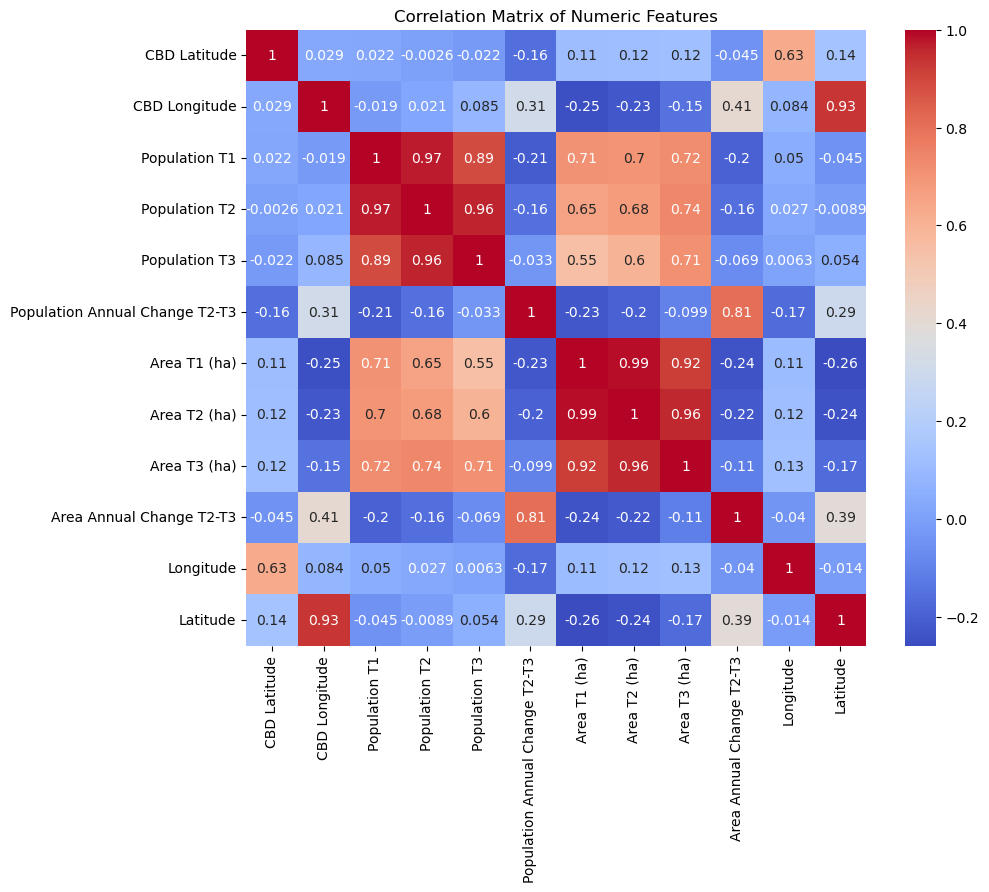

In [13]:
# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

This correlation matrix provides insight into the relationships between the different variables in our dataset, especially how population growth correlates with the increase in urban area.

The correlation between the population annual change and area annual change (0.81) suggests that there is a strong positive relationship between population growth and the expansion of urban area. That is to say, in cities where population grows quickly, the area of the city tends to also grow quickly. This aligns with the understanding that a growing population demands more space for housing and infrastructure.

### Inclusion of Economic Data

We would like to explore the relationship between the growth in some Economic indicators and the growth in urban area expansion. These Economic indicators include 'GDP per capita (USD, constant prices, constant PPP, base year 2015)', 'GDP of the metropolitan area as a share of the national GDP', 'Labour productivity (GDP per worker in USD, constant prices, constant PPP, base year 2015)', 'Employment at place of work', and 'GDP (Million USD, constant prices, constant PPP, base year 2015)'.

In [14]:
df2['Variable'].unique()

array(['Labour productivity (GDP per worker in USD, constant prices, constant PPP, base year 2015)',
       'GDP (Million USD, constant prices, constant PPP, base year 2015)',
       'GDP per capita (USD, constant prices, constant PPP, base year 2015)',
       'GDP of the metropolitan area as a share of the national GDP',
       'Employment at place of work'], dtype=object)

In [15]:
# drop duplicate column
df2.drop(columns='TIME', inplace = True)
# rename the Geography column
df2.rename(columns={'Geography': 'City Name'}, inplace=True)

In [16]:
# list of cities the two dataset have in common
count = 0
for country in df2['City Name'].unique():
    if country in (df['City Name'].unique()):
        count += 1
        print(country)
print(count)

Houston
Budapest
Jinju
Paris
Seoul
Lausanne
Valledupar
Kaunas
Cordoba
Malatya
Palermo
London
Montreal
Leon
Santiago
Fukuoka
Guadalajara
Istanbul
Culiacan
Victoria
Manchester
Madrid
Osaka
Reynosa
Zwolle
Kayseri
Tijuana
Thessaloniki
Tokyo
Okayama
Chicago
Berlin
Le Mans
Mexico City
Minneapolis
Sheffield
Auckland
37


In [17]:
# Split the DataFrame into two based on the year
df2_2009 = df2[df2['Time'] == 2009][['City Name','Variable', 'Time', 'Value']]
df2_2010 = df2[df2['Time'] == 2010][['City Name','Variable', 'Time', 'Value']]

In [18]:
# Merge the two DataFrames on 'City Name'
merged_gdp = pd.merge(df2_2009, df2_2010, on=['City Name','Variable'], suffixes=('_2009', '_2010'))
merged_gdp.head(5)

,City Name,Variable,Time_2009,Value_2009,Time_2010,Value_2010
0,Barcelona,"Labour productivity (GDP per worker in USD, co...",2009,85139.0,2010,86798.0
1,Kingston upon Hull,"GDP (Million USD, constant prices, constant PP...",2009,18440.0,2010,17993.0
2,Debrecen,"GDP (Million USD, constant prices, constant PP...",2009,5794.0,2010,5982.0
3,Villahermosa,"GDP per capita (USD, constant prices, constant...",2009,28479.0,2010,31339.0
4,Uppsala,GDP of the metropolitan area as a share of the...,2009,2.7,2010,2.7


In [19]:
df_new = df[['City Name', 'Country', 'Area Annual Change T2-T3']]

In [20]:
# Calculate the Economic growth
merged_gdp['Economic growth'] = (merged_gdp['Value_2010'] - merged_gdp['Value_2009']) / merged_gdp['Value_2009']
merged_gdp.head()

,City Name,Variable,Time_2009,Value_2009,Time_2010,Value_2010,Economic growth
0,Barcelona,"Labour productivity (GDP per worker in USD, co...",2009,85139.0,2010,86798.0,0.019486
1,Kingston upon Hull,"GDP (Million USD, constant prices, constant PP...",2009,18440.0,2010,17993.0,-0.024241
2,Debrecen,"GDP (Million USD, constant prices, constant PP...",2009,5794.0,2010,5982.0,0.032447
3,Villahermosa,"GDP per capita (USD, constant prices, constant...",2009,28479.0,2010,31339.0,0.100425
4,Uppsala,GDP of the metropolitan area as a share of the...,2009,2.7,2010,2.7,0.000000


In [21]:
# pivot the economic variables to have one row per city
pivot_df_new = merged_gdp.pivot_table(index='City Name', columns='Variable', values='Economic growth', aggfunc='mean').reset_index()
pivot_df_new.head()

Variable,City Name,Employment at place of work,"GDP (Million USD, constant prices, constant PPP, base year 2015)",GDP of the metropolitan area as a share of the national GDP,"GDP per capita (USD, constant prices, constant PPP, base year 2015)","Labour productivity (GDP per worker in USD, constant prices, constant PPP, base year 2015)"
0,'s-Gravenhage,-0.039323,0.016518,0.000000,0.006979,0.058129
1,'s-Hertogenbosch,0.003304,-0.031935,-0.062500,-0.036669,-0.035122
2,A Coruña,-0.003570,0.011843,0.000000,0.006942,0.015427
3,Aachen,0.011127,0.028880,0.000000,0.032782,0.017538
4,Aalborg,-0.017794,-0.020349,-0.041667,-0.023734,-0.002528


In [22]:
# Merge the pivoted economic data with the urban area change
analysis_df_new = pd.merge(pivot_df_new, df_new.drop_duplicates(), on=['City Name'])
analysis_df_new.head()

,City Name,Employment at place of work,"GDP (Million USD, constant prices, constant PPP, base year 2015)",GDP of the metropolitan area as a share of the national GDP,"GDP per capita (USD, constant prices, constant PPP, base year 2015)","Labour productivity (GDP per worker in USD, constant prices, constant PPP, base year 2015)",Country,Area Annual Change T2-T3
0,Auckland,-0.023204,0.006549,-0.002890,-0.006000,0.030444,New Zealand,1.2
1,Berlin,0.010133,0.032056,0.000000,0.029419,0.021707,Germany,3.3
2,Budapest,-0.019885,-0.002664,-0.012245,-0.010840,0.017563,Hungary,5.5
3,Chicago,-0.008090,0.011997,0.000000,0.007608,0.018099,United States,0.9
4,Cordoba,0.043251,0.056821,0.000000,0.041940,0.012929,Argentina,1.9


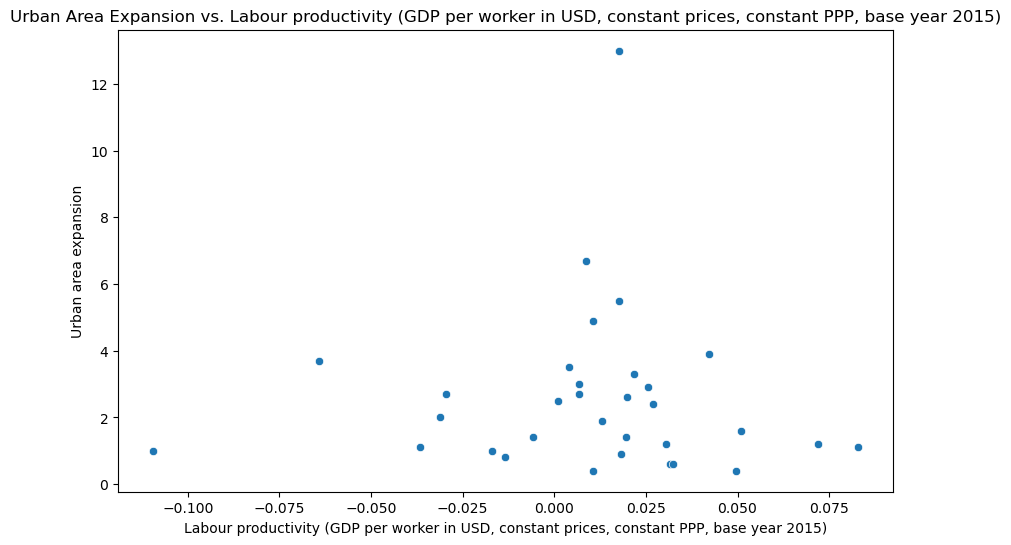

In [23]:
economic_variable = 'Labour productivity (GDP per worker in USD, constant prices, constant PPP, base year 2015)'

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=analysis_df_new, x=economic_variable, y='Area Annual Change T2-T3')
plt.title(f'Urban Area Expansion vs. {economic_variable}')
plt.xlabel(economic_variable)
plt.ylabel('Urban area expansion')
plt.show()

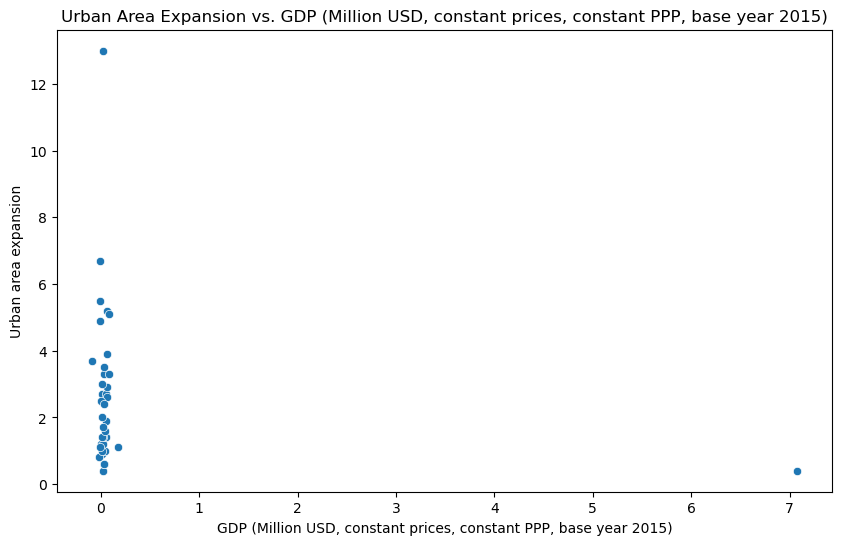

In [24]:
economic_variable = 'GDP (Million USD, constant prices, constant PPP, base year 2015)'

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=analysis_df_new, x=economic_variable, y='Area Annual Change T2-T3')
plt.title(f'Urban Area Expansion vs. {economic_variable}')
plt.xlabel(economic_variable)
plt.ylabel('Urban area expansion')
plt.show()

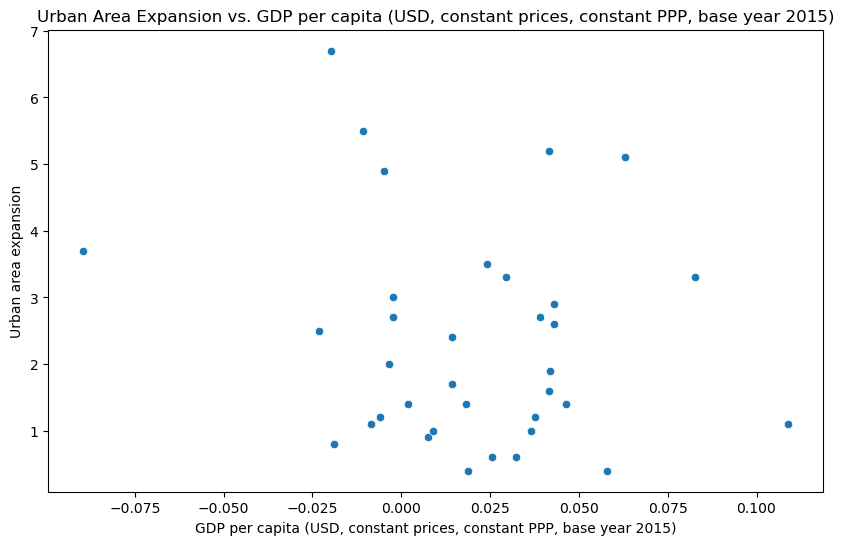

In [25]:
economic_variable = 'GDP per capita (USD, constant prices, constant PPP, base year 2015)'

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=analysis_df_new, x=economic_variable, y='Area Annual Change T2-T3')
plt.title(f'Urban Area Expansion vs. {economic_variable}')
plt.xlabel(economic_variable)
plt.ylabel('Urban area expansion')
plt.show()

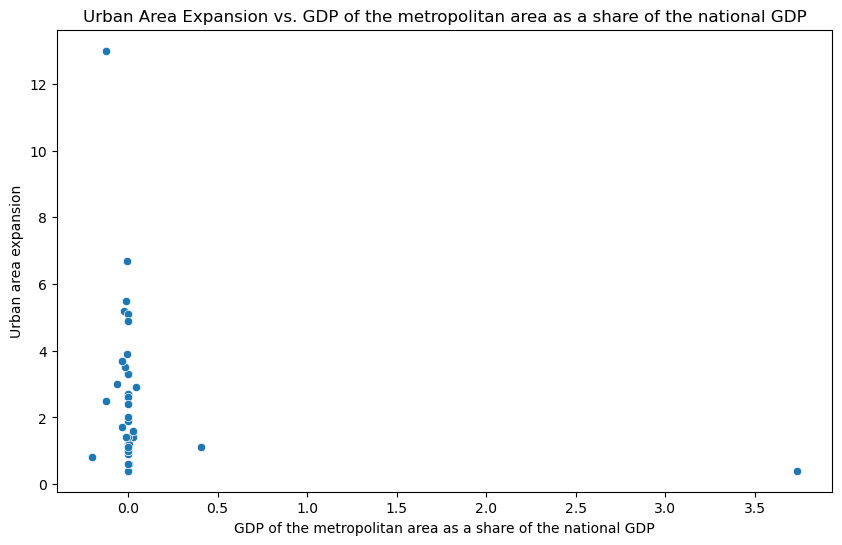

In [26]:
economic_variable = 'GDP of the metropolitan area as a share of the national GDP'

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=analysis_df_new, x=economic_variable, y='Area Annual Change T2-T3')
plt.title(f'Urban Area Expansion vs. {economic_variable}')
plt.xlabel(economic_variable)
plt.ylabel('Urban area expansion')
plt.show()

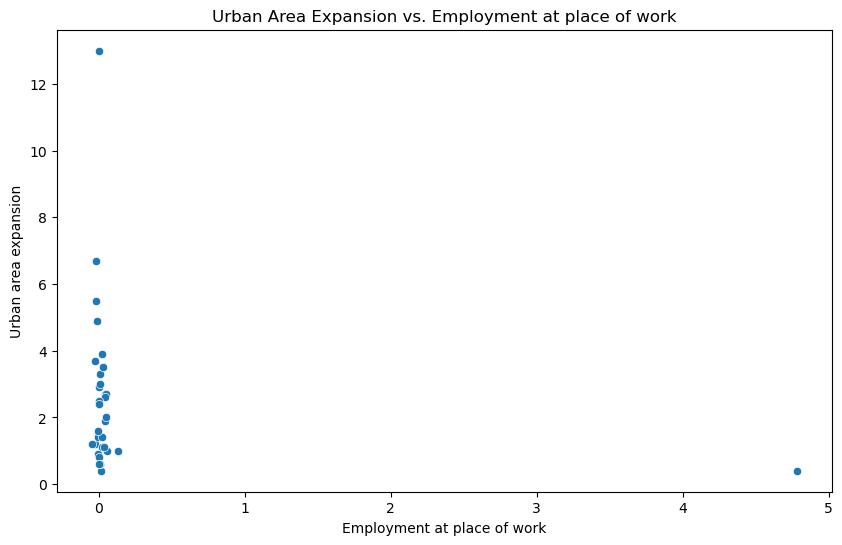

In [27]:
economic_variable = 'Employment at place of work'

# Create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=analysis_df_new, x=economic_variable, y='Area Annual Change T2-T3')
plt.title(f'Urban Area Expansion vs. {economic_variable}')
plt.xlabel(economic_variable)
plt.ylabel('Urban area expansion')
plt.show()

We can observe a moderate correlation between the growth in GDP per capita and the expansion of urban areas, as well as between the increase in labor productivity and urban area expansion. Most cities, particularly those with lower GDP per capita growth, tend to have lower rates of urban area expansion. Also, cities with higher labor productivity growth often experience greater urban expansion rates.

There are some outliers with low urban expansion rates that do not strongly correlate with decreases in economic growth, indicating that factors other than economic performance may influence urban expansion in these instances. Alternatively, this could be attributed to the small sample size, as data were only collected from 37 cities. None of the economic indicators display a clear linear relationship, suggesting that no single economic factor may be a strong predictor of urban area expansion for the cities within this dataset

In [28]:
df[df['Country'] == 'Korea Rep.']

,City Name,Country,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude
28,Busan,Korea Rep.,East Asia and the Pacific,35.167,129.036,2/1/1991,10/1/2000,9/1/2013,3731022,3837305,3974065,0.3,13690,20898,32657,3.5,35.179953,129.075236
37,Cheonan,Korea Rep.,East Asia and the Pacific,36.826,127.144,2/1/1991,8/1/2000,9/1/2014,111318,210488,552995,6.9,916,2900,9037,8.1,36.815028,127.114065
59,Gwangju,Korea Rep.,East Asia and the Pacific,35.146,126.919,10/1/1989,3/1/2000,5/1/2015,723576,1054149,1368716,1.7,3639,8151,16033,4.5,35.159465,126.851503
77,Jinju,Korea Rep.,East Asia and the Pacific,35.187,128.107,4/1/1988,4/1/2000,5/1/2014,200588,154175,317194,5.1,1860,2158,13432,13.0,35.180346,128.107995
156,Seoul,Korea Rep.,East Asia and the Pacific,37.495,126.939,8/1/1991,5/1/2000,5/1/2014,17106932,19696142,23711624,1.3,67574,116423,199578,3.9,37.566679,126.978291


In [29]:
df[df['Country'] == 'Congo Dem. Rep.']

,City Name,Country,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude
90,Kinshasa,Congo Dem. Rep.,Sub-Saharan Africa,-4.374,15.32,8/1/1994,9/1/2000,7/1/2013,4226053,6379816,10226183,3.7,7878,20142,33763,4.0,-4.321706,15.312597
102,Lubumbashi,Congo Dem. Rep.,Sub-Saharan Africa,-11.677,27.48,7/1/1990,9/1/1998,8/1/2013,660736,942352,1746415,4.1,5509,8435,15865,4.2,-11.664232,27.482626


In [30]:
df[df['Country'] == 'Korea Dem. Rep.']

,City Name,Country,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude
139,Pyongyang,Korea Dem. Rep.,East Asia and the Pacific,39.045,125.767,3/1/1990,5/1/2000,3/1/2014,1524988,1674292,1996172,1.3,8695,11242,11463,0.1,39.016798,125.747361


In [31]:
# import pycountry_convert as pc
# https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

# Example
country_name = 'Democratic Republic of the Congo'
print(country_to_continent(country_name))

Africa


c:\Users\eric8\anaconda3\envs\jpl\lib\site-packages\pycountry\db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
c:\Users\eric8\anaconda3\envs\jpl\lib\site-packages\pycountry\db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


In [32]:
continent = []
countries = list(df['Country'])
for country in countries:
    if (country == 'Korea Rep.') or (country == 'Korea Dem. Rep.'):
        continent.append('Asia')
    elif (country == 'Congo Dem. Rep.'):
        continent.append('Africa')
    else:
        continent.append(country_to_continent(country))
continent

['Africa',
 'Africa',
 'Asia',
 'Asia',
 'Africa',
 'Africa',
 'Asia',
 'Europe',
 'Africa',
 'Europe',
 'Oceania',
 'Asia',
 'Asia',
 'Asia',
 'Africa',
 'Asia',
 'Asia',
 'Africa',
 'Asia',
 'Europe',
 'South America',
 'Europe',
 'Europe',
 'Asia',
 'South America',
 'Europe',
 'South America',
 'Asia',
 'Asia',
 'South America',
 'Africa',
 'South America',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'North America',
 'Asia',
 'North America',
 'South America',
 'Asia',
 'South America',
 'North America',
 'South America',
 'Asia',
 'Europe',
 'South America',
 'Asia',
 'North America',
 'Asia',
 'Africa',
 'Europe',
 'Asia',
 'North America',
 'Asia',
 'North America',
 'Asia',
 'Asia',
 'Asia',
 'Europe',
 'Asia',
 'Asia',
 'Asia',
 'North America',
 'Asia',
 'North America',
 'Asia',
 'Africa',
 'South America',
 'Asia',
 'Asia',
 'Asia',
 'Asia',
 'South America',
 'Asia',
 'Asia',
 'Africa',
 'Asia',
 'Asia',
 'Africa',
 'Africa',
 'Asia',
 'Asia',
 'Europe',
 'Asia

In [33]:
# Add continent data to df
df['Continent'] = continent
df

,City Name,Country,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude,Continent
0,Accra,Ghana,Sub-Saharan Africa,5.615,-0.159,1/1/1991,2/1/2000,3/1/2014,1307784,2513026,4429649,4.0,10022,32171,61781,4.6,5.557110,-0.201238,Africa
1,Addis Ababa,Ethiopia,Sub-Saharan Africa,9.001,38.756,1/1/1986,12/1/2000,12/1/2010,1445701,2276356,3009130,2.8,7531,11713,21133,5.9,9.035829,38.752413,Africa
2,Ahmedabad,India,South and Central Asia,23.037,72.589,12/1/1989,10/1/2000,10/1/2013,3737723,4718391,6232952,2.1,12174,15916,21103,2.2,23.021624,72.579707,Asia
3,Ahvaz,Iran,South and Central Asia,31.320,48.665,11/1/1991,9/1/2000,9/1/2013,698310,853527,1178560,2.5,7079,9200,12873,2.6,31.323064,48.679320,Asia
4,Alexandria,Egypt,Western Asia and North Africa,31.152,29.884,10/1/1987,4/1/1999,7/1/2013,2558891,3132780,4345193,2.3,7818,15514,22782,2.7,44.834953,8.745030,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,"Yulin, Guangxi",China,East Asia and the Pacific,22.611,110.139,10/1/1991,10/1/2000,1/1/2009,250302,345816,633381,7.3,1287,3871,10753,12.4,22.657026,110.176502,Asia
196,"Zhengzhou, Henan",China,East Asia and the Pacific,34.756,113.637,10/1/1992,8/1/2000,9/1/2015,1256956,2012209,7156619,8.4,12742,25588,137261,11.1,34.753339,113.659998,Asia
197,"Zhuji, Zhejiang",China,East Asia and the Pacific,29.725,120.237,6/1/1990,5/1/2000,4/1/2013,367695,695581,979670,2.7,11970,29130,43826,3.2,29.729662,120.180543,Asia
198,"Zunyi, Guizhou",China,East Asia and the Pacific,27.696,106.925,6/1/1988,4/1/2001,12/1/2013,24968,501484,534107,0.5,89,1788,5569,9.0,27.725414,107.026957,Asia


In [34]:
df['Continent'].unique()

array(['Africa', 'Asia', 'Europe', 'Oceania', 'South America',
       'North America'], dtype=object)

In [35]:
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world_data['continent'].unique()

C:\Users\eric8\AppData\Local\Temp\ipykernel_15416\745123776.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

### Plot By Continent

Define all the data frame by contients.

In [36]:
africa = df[df['Continent'] == 'Africa']
asia = df[df['Continent'] == 'Asia']
europe = df[df['Continent'] == 'Europe']
oceania = df[df['Continent'] == 'Oceania']
south_america = df[df['Continent'] == 'South America']
north_america = df[df['Continent'] == 'North America']

In [37]:
# gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['CBD Latitude'], df['CBD Longitude']))
# df_geo_africa = gpd.GeoDataFrame(africa, geometry = gpd.points_from_xy(africa['CBD Latitude'], africa['CBD Longitude']))

# Assuming you have a list of DataFrames
# conts = [africa, asia, europe, oceania, south_america, north_america] 
# cont = [africa] 

# Iterate over the list of DataFrames
def make_geometry_usingCBD(df):
    # Apply the operation to each DataFrame
    df['geometry'] = gpd.points_from_xy(df['CBD Longitude'], df['CBD Latitude'])
    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    return gdf

def make_geometry_normal(df):
    # Apply the operation to each DataFrame
    df['geometry'] = gpd.points_from_xy(df['Longitude'], df['Latitude'])
    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry')
    return gdf

In [38]:
africa_geo = make_geometry_usingCBD(africa.copy())
asia_geo = make_geometry_usingCBD(asia.copy())
europe_geo = make_geometry_usingCBD(europe.copy())
oceania_geo = make_geometry_usingCBD(oceania.copy())
south_america_geo = make_geometry_usingCBD(south_america.copy())
north_america_geo = make_geometry_usingCBD(north_america.copy())

### Plot Continent
For example we will choose Africa.

This is using CBD coordinates.

C:\Users\eric8\AppData\Local\Temp\ipykernel_15416\2556150882.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


Text(0.5, 1.0, 'Africa')

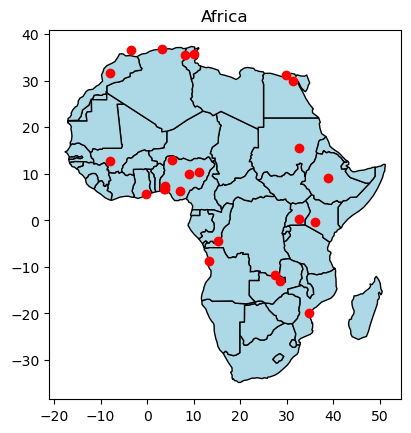

In [39]:
# plotting by continent
# https://www.youtube.com/watch?v=5G-1k4CNChI
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


axis = world_data[world_data.continent == 'Africa'].plot(color = 'lightblue', edgecolor = 'black')

africa_geo.plot(ax = axis, color = 'red')
plt.title('Africa')

### Plot Country

For example, we will plot South Korea.

In [40]:
world_data[world_data['name'] == 'South Korea']

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
96,51709098.0,Asia,South Korea,KOR,1646739,"POLYGON ((126.17476 37.74969, 126.23734 37.840..."


In [41]:
south_korea = df[df['Country'] == 'Korea Rep.']
south_korea

,City Name,Country,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude,Continent
28,Busan,Korea Rep.,East Asia and the Pacific,35.167,129.036,2/1/1991,10/1/2000,9/1/2013,3731022,3837305,3974065,0.3,13690,20898,32657,3.5,35.179953,129.075236,Asia
37,Cheonan,Korea Rep.,East Asia and the Pacific,36.826,127.144,2/1/1991,8/1/2000,9/1/2014,111318,210488,552995,6.9,916,2900,9037,8.1,36.815028,127.114065,Asia
59,Gwangju,Korea Rep.,East Asia and the Pacific,35.146,126.919,10/1/1989,3/1/2000,5/1/2015,723576,1054149,1368716,1.7,3639,8151,16033,4.5,35.159465,126.851503,Asia
77,Jinju,Korea Rep.,East Asia and the Pacific,35.187,128.107,4/1/1988,4/1/2000,5/1/2014,200588,154175,317194,5.1,1860,2158,13432,13.0,35.180346,128.107995,Asia
156,Seoul,Korea Rep.,East Asia and the Pacific,37.495,126.939,8/1/1991,5/1/2000,5/1/2014,17106932,19696142,23711624,1.3,67574,116423,199578,3.9,37.566679,126.978291,Asia


In [42]:
south_korea_geo1 = make_geometry_usingCBD(south_korea.copy())

Text(0.5, 1.0, 'South Korea')

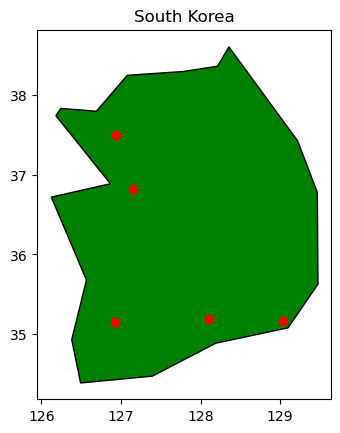

In [43]:
axis = world_data[world_data.name == 'South Korea'].plot(color = 'green', edgecolor = 'black')

south_korea_geo1.plot(ax = axis, color = 'red')
plt.title('South Korea')

In this particular dataset, the bulk of the cities come from Asia.

In [44]:
df.groupby('Continent').count().sort_values(by='Country', ascending=False)

,City Name,Country,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude
Continent,,,,,,,,,,,,,,,,,,
Asia,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
Europe,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
Africa,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
North America,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25
South America,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Oceania,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


What are the different countries per continent? Moreover, how many cities are represented per country?

In [45]:
asia.groupby('Country').count().sort_values(by='City Name', ascending=False).head()

,City Name,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude,Continent
Country,,,,,,,,,,,,,,,,,,
China,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
India,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
Indonesia,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Japan,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Korea Rep.,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [46]:
europe.groupby('Country').count().sort_values(by='City Name', ascending=False).head()

,City Name,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude,Continent
Country,,,,,,,,,,,,,,,,,,
Russia,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
United Kingdom,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Germany,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Ukraine,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
France,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [47]:
oceania.groupby('Country').count().sort_values(by='City Name', ascending=False).head()

,City Name,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude,Continent
Country,,,,,,,,,,,,,,,,,,
Australia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Fiji,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
New Zealand,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [48]:
south_america.groupby('Country').count().sort_values(by='City Name', ascending=False).head()

,City Name,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude,Continent
Country,,,,,,,,,,,,,,,,,,
Brazil,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Argentina,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Colombia,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Venezuela,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Bolivia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [49]:
north_america.groupby('Country').count().sort_values(by='City Name', ascending=False).head()

,City Name,Region,CBD Latitude,CBD Longitude,Land CoverT1,Land Cover T2,Land Cover T3,Population T1,Population T2,Population T3,Population Annual Change T2-T3,Area T1 (ha),Area T2 (ha),Area T3 (ha),Area Annual Change T2-T3,Longitude,Latitude,Continent
Country,,,,,,,,,,,,,,,,,,
United States,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
Mexico,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
Canada,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Cuba,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
El Salvador,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


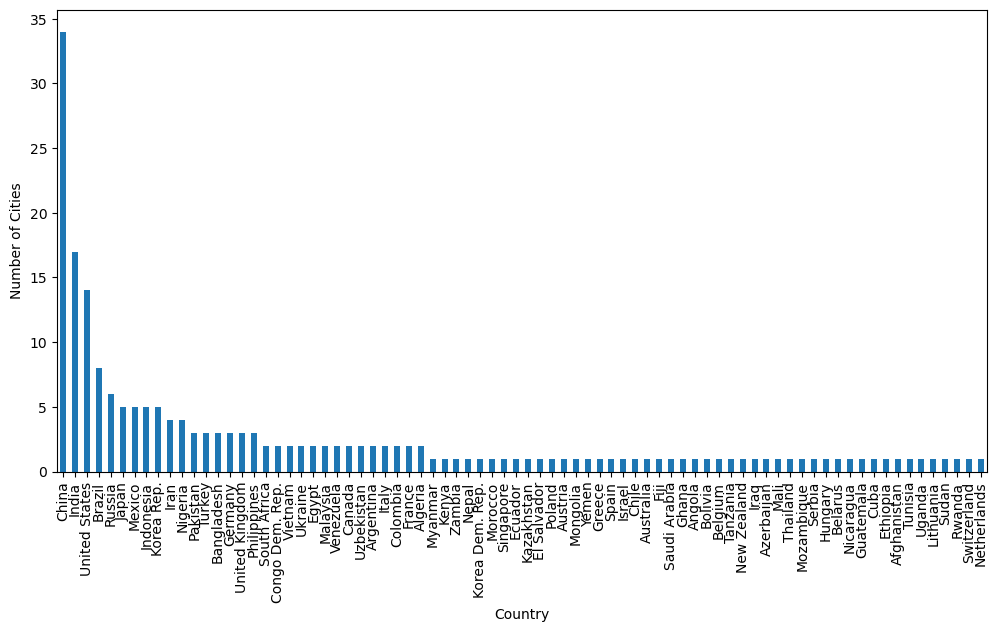

In [50]:
plt.figure(figsize=(12, 6)) 
df['Country'].value_counts().plot(kind='bar')
plt.ylabel('Number of Cities')
plt.show()

### What would be the benefit of looking at the particular region instead?

In [51]:
df['Region'].value_counts()

Region
East Asia and the Pacific          42
Europe and Japan                   34
South and Central Asia             32
Latin America and the Caribbean    26
Sub-Saharan Africa                 18
Land-Rich Developed Countries      18
Western Asia and North Africa      15
Southeast Asia                     15
Name: count, dtype: int64

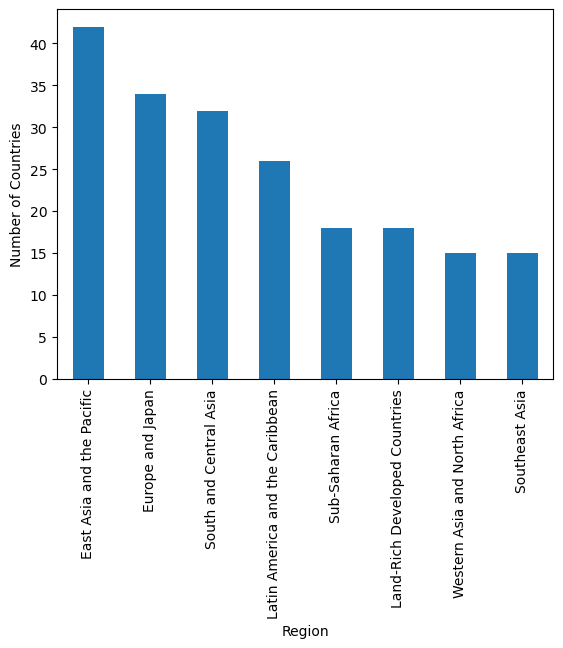

In [52]:
df['Region'].value_counts().plot(kind='bar')
plt.ylabel('Number of Countries')
plt.show()

In [53]:
# Create a dictionary mapping region to numerical values
region_encoding = {
    'East Asia and the Pacific': 0,
    'Europe and Japan': 1,
    'South and Central Asia': 2,
    'Latin America and the Caribbean': 3,
    'Land-Rich Developed Countries': 4,
    'Sub-Saharan Africa': 5,
    'Southeast Asia': 6,
    'Western Asia and North Africa': 7
}
df['Region_encoded'] = df['Region'].map(region_encoding)

# Make region encoded to be numeric 
df['Region_encoded'] = df['Region_encoded'].astype(int)

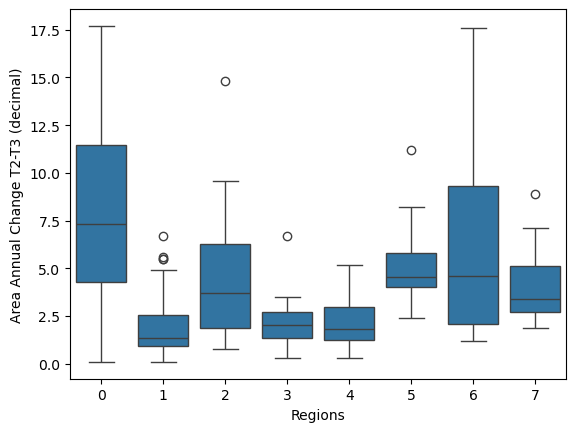

In [54]:
sns.boxplot(x='Region_encoded', y='Area Annual Change T2-T3', data=df)
plt.xlabel('Regions')
plt.ylabel('Area Annual Change T2-T3 (decimal)')
plt.show()

In [55]:
east_asia_pacific = df[df['Region'] == 'East Asia and the Pacific']
europe_japan = df[df['Region'] == 'Europe and Japan']
south_central_asia = df[df['Region'] == 'South and Central Asia']
latin_america_caribbean = df[df['Region'] == 'Latin American and the Caribbean']
sub_saharan_africa = df[df['Region'] == 'Sub-Saharan Africa']
land_rich_developed_countries = df[df['Region'] == 'Land-Rich Developed Countries']
western_asia_north_africa = df[df['Region'] == 'Western Asia and North Africa']
southeast_asia = df[df['Region'] == 'Southeast Asia']

According to this dataset, which country is defined to be land rich and developed?

In [56]:
land_rich_developed_countries['Country'].value_counts()

Country
United States    14
Canada            2
New Zealand       1
Australia         1
Name: count, dtype: int64

Which are the top countries that have the most Area Annual Change T2-T3?

In [57]:
# df.groupby('Country').max().sort_values(by='Area Annual Change T2-T3', ascending=False)
df[['Country', 'Area Annual Change T2-T3']].groupby('Country').max().sort_values(by='Area Annual Change T2-T3', ascending=False).head(10)

,Area Annual Change T2-T3
Country,
China,17.7
Vietnam,17.6
India,14.8
Korea Rep.,13.0
Malaysia,12.9
Indonesia,12.5
Mozambique,11.2
Uzbekistan,9.4
Bangladesh,9.1


It looks like China, India, and Vietnam has the most Area Annual Change from T2-T3.

Which are the top regions that have the most Area Annual Change T2-T3?

In [58]:
df[[ 'Region', 'Area Annual Change T2-T3']].groupby('Region').max().sort_values(by='Area Annual Change T2-T3', ascending=False)

,Area Annual Change T2-T3
Region,
East Asia and the Pacific,17.7
Southeast Asia,17.6
South and Central Asia,14.8
Sub-Saharan Africa,11.2
Western Asia and North Africa,8.9
Europe and Japan,6.7
Latin America and the Caribbean,6.7
Land-Rich Developed Countries,5.2


Meanwhile, we see that the top regions that have the most Area Annual Change are East Asia and the Pacific, South and Central Asia, and Southeast Asia.


## 5 What (if any) analyses have already been performed on this data (or another similar dataset)?)


According to our original data provider \href{http://atlasofurbanexpansion.org/data}, researchers have initiated a systematic analysis to dissect the complexities of urban growth. Through this analytical framework, the study aims to contribute significantly to the scientific understanding of urban growth mechanisms and their implications, fostering informed policy-making and urban planning strategies to address the challenges and opportunities presented by global urbanization trends.

#### 5.1 Data Collection
The sampling process for estimating urban populations begins with identifying enumeration zones that encompass or intersect a city's urban extent as of a specific date. Population figures for these zones are obtained directly if data matches the date or estimated through interpolation or extrapolation otherwise. This population is then evenly distributed among all built-up pixels within each zone, defined as areas covered by buildings or urban infrastructure. For zones only partially within the urban extent, the population is adjusted to reflect only the proportion within the boundary, and built-up pixels associated with rural roads are excluded to minimize bias. The final step involves summing the adjusted population estimates of all zones intersecting the urban extent to arrive at the total urban population.
#### 5.2 Selection of 200 Sample Cities
The selection process for the 200 sample cities utilized a stratified sampling strategy, organizing cities into a three-dimensional framework based on world regions, city population size ranges, and the number of cities per country. This approach resulted in 96 theoretical boxes, of which 76 contained cities, ensuring a diverse and representative global sample. Cities were randomly chosen from these boxes in proportion to their population, with some cities representing others from non-selected boxes to ensure full coverage. This method ensured that each selected city represented a broader segment of the global urban environment, with specific city-based and population-based weights assigned to facilitate accurate extrapolation and analysis of urban trends across the entire universe of cities. The selection process was validated by comparing sample and universe population growth rates, affirming the representatives of the sample at a 95 percent confidence level.
#### 5.3 Representative Groups of 30 Cities
A representative group of 30 cities, including 27 from the global sample of 200 cities, was created to explore long-term changes in urban expansion, urban population density, and the attributes of urban 19 layouts from circa 1800 until circa 2014. The strategy for selecting cities for historical analysis of urban expansion involved a careful balance between geographic distribution and the practicality of map availability, ensuring a comprehensive representation from the global sample. By including cities based on the availability of detailed, geo-referenceable historic maps, the researchers were able to create a dynamic visual and analytical representation of urban growth over more than two centuries. This method allowed for a nuanced examination of long-term urban expansion, population density changes, and evolving urban layouts, providing valuable insights into the patterns and impacts of urbanization.



## 6) Analyses performed for the project

Before we start the analyses, we have to make sure our dataframe can be processed by the ols method. We need to change the column names to make it work with the input syntax.

In [59]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', 'to')

In [60]:
df.head()

,City_Name,Country,Region,CBD_Latitude,CBD_Longitude,Land_CoverT1,Land_Cover_T2,Land_Cover_T3,Population_T1,Population_T2,Population_T3,Population_Annual_Change_T2toT3,Area_T1_(ha),Area_T2_(ha),Area_T3_(ha),Area_Annual_Change_T2toT3,Longitude,Latitude,Continent,Region_encoded
0,Accra,Ghana,Sub-Saharan Africa,5.615,-0.159,1/1/1991,2/1/2000,3/1/2014,1307784,2513026,4429649,4.0,10022,32171,61781,4.6,5.557110,-0.201238,Africa,5
1,Addis Ababa,Ethiopia,Sub-Saharan Africa,9.001,38.756,1/1/1986,12/1/2000,12/1/2010,1445701,2276356,3009130,2.8,7531,11713,21133,5.9,9.035829,38.752413,Africa,5
2,Ahmedabad,India,South and Central Asia,23.037,72.589,12/1/1989,10/1/2000,10/1/2013,3737723,4718391,6232952,2.1,12174,15916,21103,2.2,23.021624,72.579707,Asia,2
3,Ahvaz,Iran,South and Central Asia,31.320,48.665,11/1/1991,9/1/2000,9/1/2013,698310,853527,1178560,2.5,7079,9200,12873,2.6,31.323064,48.679320,Asia,2
4,Alexandria,Egypt,Western Asia and North Africa,31.152,29.884,10/1/1987,4/1/1999,7/1/2013,2558891,3132780,4345193,2.3,7818,15514,22782,2.7,44.834953,8.745030,Africa,7


Once we format our dataframe correctly, we can begin to build a model. Based off our EDA, it looks like there are two different leads we can follow.

One seeming trend is that the growth of urban areas seems to be based on the region or continent that the city is located in. We can build a linear regression model for those two variables (the ols method with one-hot encode those features for us as long as we provide a valid column name).

In [61]:
modelRegion = smf.ols('Area_Annual_Change_T2toT3 ~ Region', data=df).fit()

modelRegion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Area_Annual_Change_T2toT3   R-squared:                       0.348
Model:                                   OLS   Adj. R-squared:                  0.325
Method:                        Least Squares   F-statistic:                     14.67
Date:                       Sun, 17 Mar 2024   Prob (F-statistic):           2.97e-15
Time:                               22:44:31   Log-Likelihood:                -502.85
No. Observations:                        200   AIC:                             1022.
Df Residuals:                            192   BIC:                             1048.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     7.8548      0.471     16.680      0.000       6.926       8.784
Region[T.Europe and Japan]                   -5.7930      0.704     -8.228      0.000      -7.182      -4.404
Region[T.Land-Rich Developed Countries]      -5.6992      0.860     -6.629      0.000      -7.395      -4.003
Region[T.Latin America and the Caribbean]    -5.6625      0.762     -7.435      0.000      -7.165      -4.160
Region[T.South and Central Asia]             -3.1548      0.716     -4.405      0.000      -4.567      -1.742
Region[T.Southeast Asia]                     -1.8214      0.918     -1.984      0.049      -3.632      -0.011
Region[T.Sub-Saharan Africa]                 -2.7881      0.860     -3.243      0.001      -4.484      -1.092
Region[T.Western Asia and North Africa]      -3.7281      0.918     -4.061      0.000      -5.539      -1.918
==============================================================================
Omnibus:                       31.125   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.845
Skew:                           0.858   Prob(JB):                     2.47e-11
Kurtosis:                       4.707   Cond. No.                         7.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
modelContinent = smf.ols('Area_Annual_Change_T2toT3 ~ Continent', data=df).fit()

modelContinent.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Area_Annual_Change_T2toT3   R-squared:                       0.228
Model:                                   OLS   Adj. R-squared:                  0.208
Method:                        Least Squares   F-statistic:                     11.44
Date:                       Sun, 17 Mar 2024   Prob (F-statistic):           1.09e-09
Time:                               22:44:31   Log-Likelihood:                -519.84
No. Observations:                        200   AIC:                             1052.
Df Residuals:                            194   BIC:                             1071.
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.9440      0.661      7.479      0.000       3.640       6.248
Continent[T.Asia]              1.0392      0.738      1.407      0.161      -0.417       2.495
Continent[T.Europe]           -2.7199      0.902     -3.015      0.003      -4.499      -0.941
Continent[T.North America]    -2.5840      0.935     -2.764      0.006      -4.428      -0.740
Continent[T.Oceania]          -3.4440      2.019     -1.705      0.090      -7.427       0.539
Continent[T.South America]    -2.9499      1.039     -2.839      0.005      -4.999      -0.901
==============================================================================
Omnibus:                       35.247   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.453
Skew:                           1.013   Prob(JB):                     6.72e-12
Kurtosis:                       4.439   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can't use both features because region and continent are highly correlated, so we can determine that region is a better feature overall than continent since it has a higher R-value.

The second lead that we can follow is related to the population growth of urban areas. If we take the annual population change, we might be able to squeeze out even better results from a linear regression model.

In [63]:
modelPopulation = smf.ols('Area_Annual_Change_T2toT3 ~ Population_Annual_Change_T2toT3', data=df).fit()

modelPopulation.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Area_Annual_Change_T2toT3   R-squared:                       0.651
Model:                                   OLS   Adj. R-squared:                  0.649
Method:                        Least Squares   F-statistic:                     368.8
Date:                       Sun, 17 Mar 2024   Prob (F-statistic):           4.19e-47
Time:                               22:44:31   Log-Likelihood:                -440.50
No. Observations:                        200   AIC:                             885.0
Df Residuals:                            198   BIC:                             891.6
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.9230      0.241      3.836      0.000       0.448       1.398
Population_Annual_Change_T2toT3     1.2475      0.065     19.205      0.000       1.119       1.376
==============================================================================
Omnibus:                       47.689   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.509
Skew:                           1.145   Prob(JB):                     3.00e-21
Kurtosis:                       5.469   Cond. No.                         5.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Within this dataset alone, the population growth has strong correlation to the growth of urban areas. This is before we have explored the effects of adding economics data to our model. With the addition of economics data such as GDP growth in each country/city, we can have a better idea of how our urban areas grow. But for now, we will stick with only population growth and region. 

A better interim model might combine both of these features, in order to capture patterns in the data to their fullest extent.

In [64]:
modelPopulationAndRegion = smf.ols('Area_Annual_Change_T2toT3 ~ Population_Annual_Change_T2toT3 + Region', data=df).fit()

modelPopulationAndRegion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Area_Annual_Change_T2toT3   R-squared:                       0.708
Model:                                   OLS   Adj. R-squared:                  0.696
Method:                        Least Squares   F-statistic:                     57.87
Date:                       Sun, 17 Mar 2024   Prob (F-statistic):           4.98e-47
Time:                               22:44:31   Log-Likelihood:                -422.61
No. Observations:                        200   AIC:                             863.2
Df Residuals:                            191   BIC:                             892.9
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     2.7636      0.458      6.028      0.000       1.859       3.668
Region[T.Europe and Japan]                   -1.4652      0.550     -2.662      0.008      -2.551      -0.380
Region[T.Land-Rich Developed Countries]      -2.4058      0.616     -3.907      0.000      -3.620      -1.191
Region[T.Latin America and the Caribbean]    -2.7351      0.546     -5.012      0.000      -3.811      -1.659
Region[T.South and Central Asia]             -1.4654      0.493     -2.972      0.003      -2.438      -0.493
Region[T.Southeast Asia]                     -1.7463      0.616     -2.834      0.005      -2.962      -0.531
Region[T.Sub-Saharan Africa]                 -2.5249      0.577     -4.373      0.000      -3.664      -1.386
Region[T.Western Asia and North Africa]      -1.7700      0.629     -2.813      0.005      -3.011      -0.529
Population_Annual_Change_T2toT3               1.1435      0.075     15.334      0.000       0.996       1.291
==============================================================================
Omnibus:                       34.456   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.491
Skew:                           0.887   Prob(JB):                     7.32e-14
Kurtosis:                       5.029   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Diagnostics

Building on the analysis above, we introduced four distinct models:  
* `modelRegion`
* `modelContinent`
* `modelPopulation`
* `modelPopulationAndRegion`  

Yet, it's crucial to determine whether the underlying assumptions of these models hold true.

In [65]:
def standardize(x):
    return (x - x.mean()) / x.std()

In [66]:
from statsmodels.stats.diagnostic import acorr_ljungbox, het_white
from statsmodels.tsa.stattools import acf

In [67]:
models = [modelRegion, modelContinent, modelPopulation, modelPopulationAndRegion]

**Assumption 1: The Normality of the Residuals**

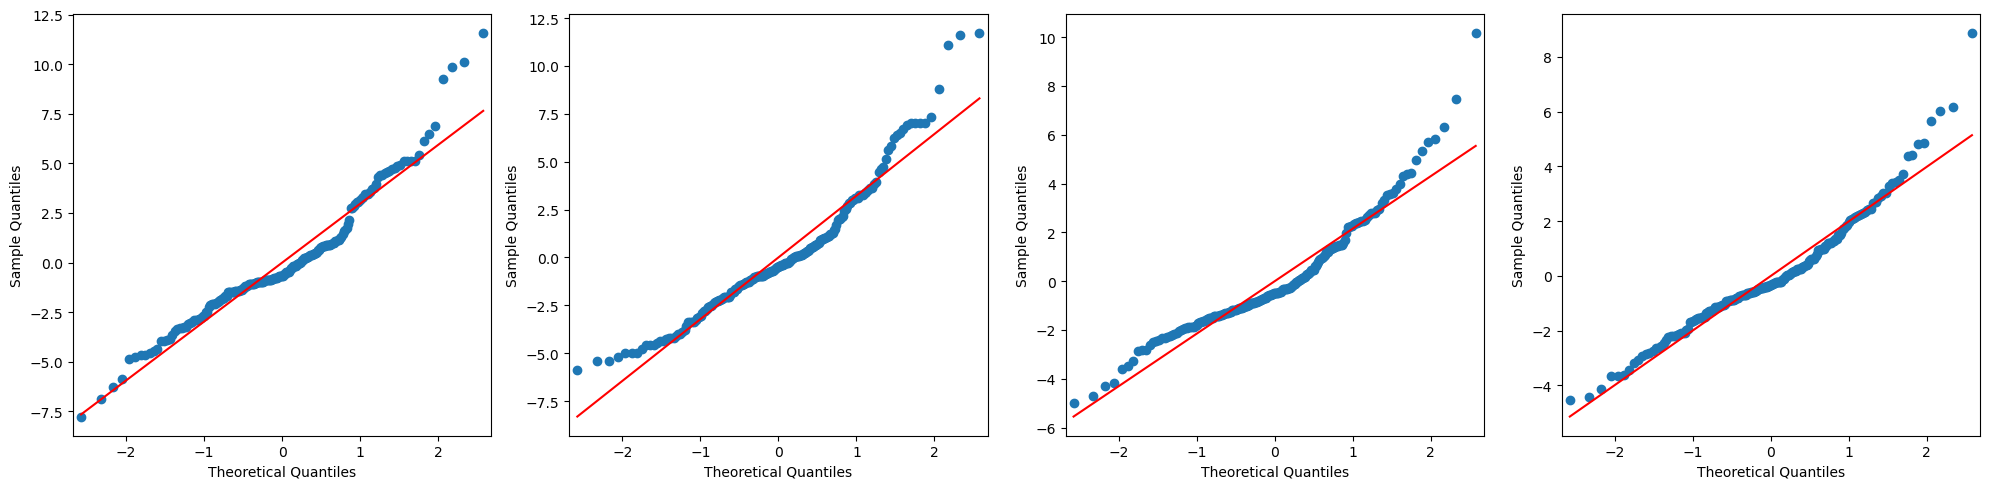

In [68]:
fig, axs = plt.subplots(1, len(models), figsize=(5 * len(models), 5))
for i, model in enumerate(models):
    sm.qqplot(model.resid, line='r', ax=axs[i])

plt.tight_layout()
plt.show()

In [69]:
shapiro_pvalues = [stats.shapiro(model.resid).pvalue for model in models]
shapiro_pvalues

[7.67205335705512e-07,
 1.3456491387842107e-07,
 2.5237524070576e-08,
 5.270291694614571e-06]

The QQ-plots do not definitively indicate whether the models breach the normality assumption for residuals. However, the extremely low p-values obtained from the Shapiro-Wilk tests suggest that the models indeed violate the assumption that the residuals are normally distributed. Despite the apparent violation of normality in the residuals, the Central Limit Theorem offers reassurance. It states that, for large sample sizes, the distribution of estimators will approximate a normal distribution. This makes the normality assumption less crucial for the validity of coefficient tests when dealing with larger datasets.

**Assumption 2: The Independence of the Residuals**

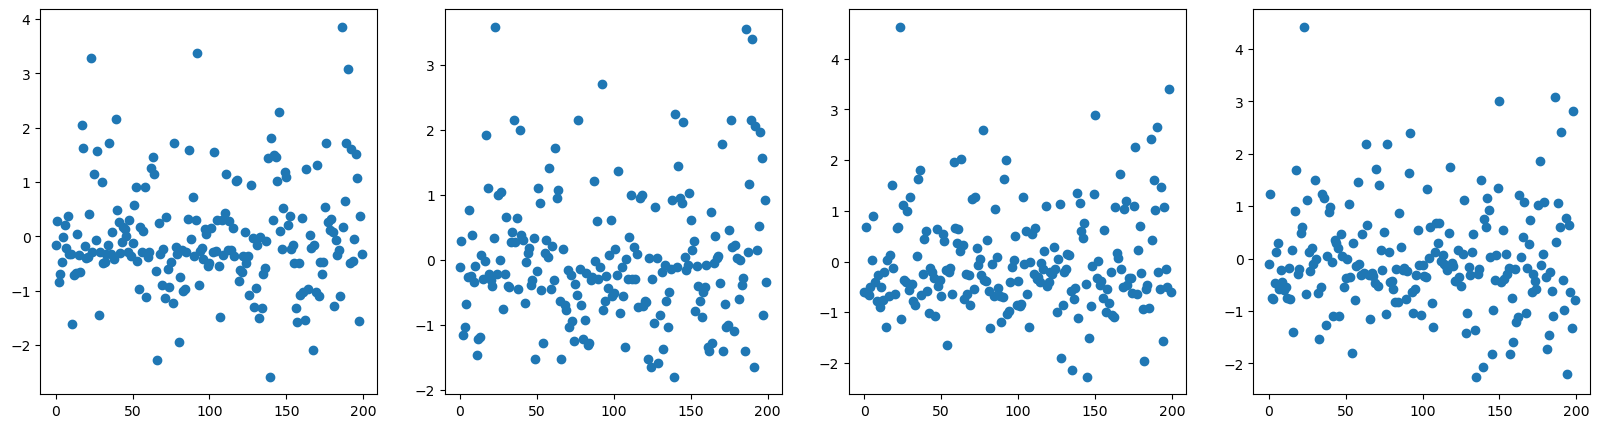

In [70]:
fig, ax = plt.subplots(1, len(models), figsize=(5 * len(models), 5))
for i, model in enumerate(models):
    ax[i].scatter(range(df.shape[0]), standardize(model.resid))

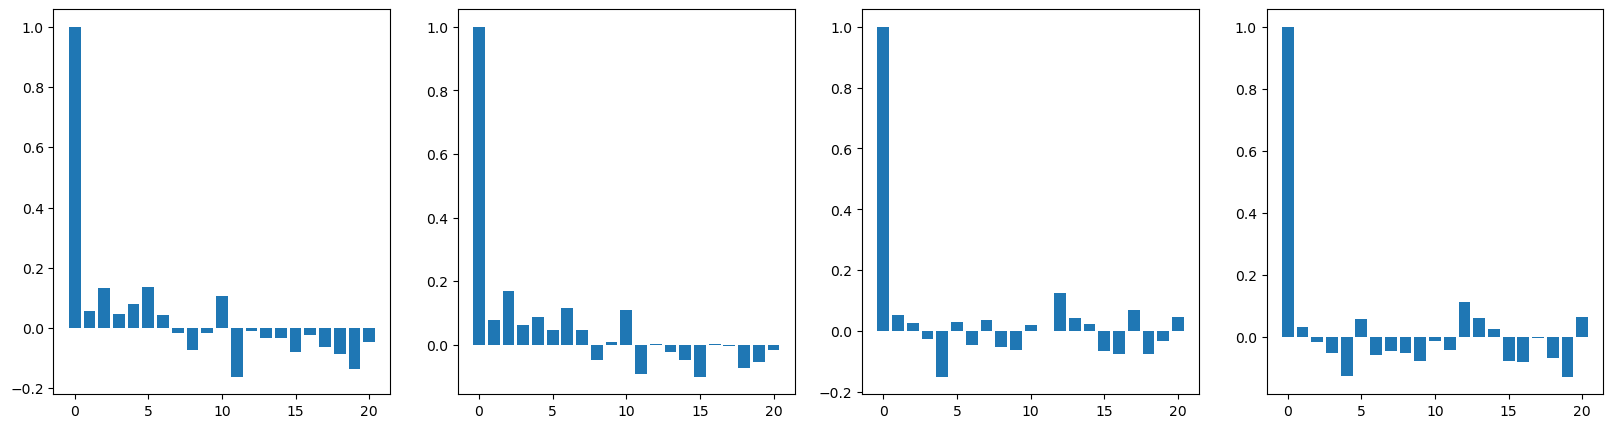

In [71]:
fig, ax = plt.subplots(1, len(models), figsize=(5 * len(models), 5))

lags = 20
for i, model in enumerate(models):
    ax[i].bar(range(lags+1), acf(model.resid, nlags=lags))

plt.show()

The analysis of scatter plots and ACF plots provides compelling evidence for the independence of residuals, a crucial assumption for our model's validity. The random distribution of data points in scatter plots suggests no systematic errors, while the ACF plots, indicating low correlation among data points, reinforce the absence of serial dependency. Together, these observations robustly affirm that our model meets the independence assumption of the residuals, underscoring its reliability and the soundness of the inferences drawn from it.

**Assumption 3: Homoscedasticity**

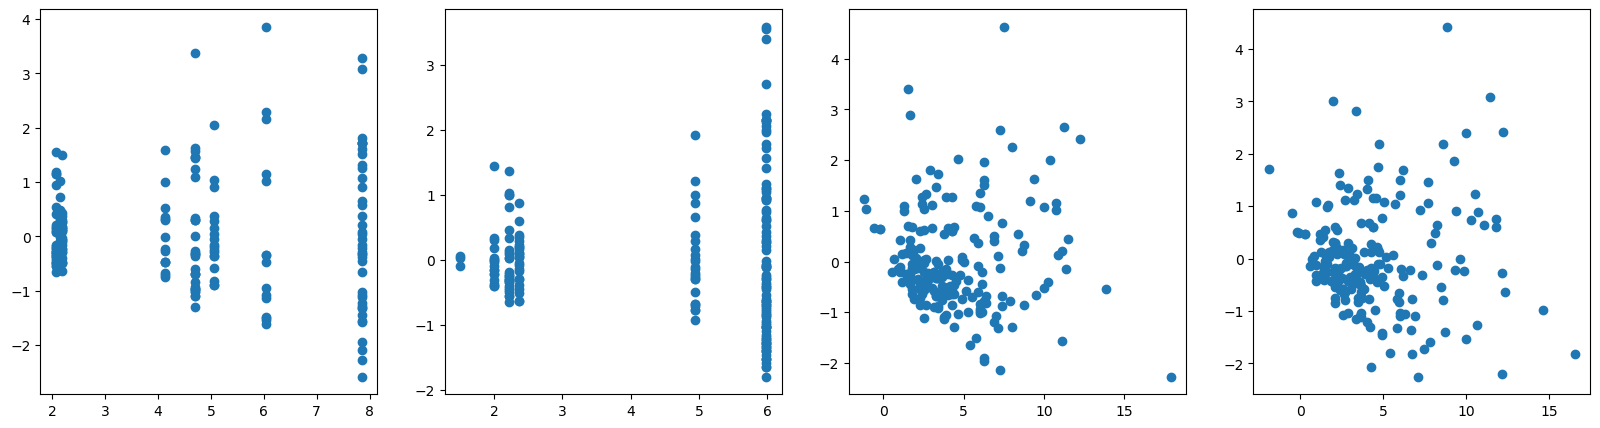

In [72]:
fig, ax = plt.subplots(1, len(models), figsize=(5 * len(models), 5))

for i, model in enumerate(models):
    ax[i].scatter(model.fittedvalues, standardize(model.resid))

plt.show()

In [73]:
for i, model in enumerate(models):
    p_values = het_white(model.resid, model.model.exog)[3]
    print(f'model: {i}, p_values: {p_values}')

model: 0, p_values: 5.037144632422914e-07
model: 1, p_values: 4.372788267703244e-06
model: 2, p_values: 0.0016308414155370295
model: 3, p_values: 0.007407429470320754


In [74]:
for model in models:
    model = model.get_robustcov_results(cov_type='HC1')

The observation from scatter plots of residuals against fitted values, which clearly display a non-random pattern, coupled with the significantly low p-values from the White test, signals a violation of the homoscedasticity assumption. To address this issue, enhancing our models by recalibrating the computation of regression coefficients' standard errors or incorporating robust standard errors to mitigate the effects of heteroscedasticity is advisable. Such adjustments ensure the reliability of hypothesis tests and confidence intervals for coefficients, even when error variances are not consistent across observations. Crucially, this method refines the interpretation of the model's accuracy without modifying the model or its residuals directly.

## 7) Interpretation of the results

For now, our best performing model combines data about annual population changes as well as the region that an urban area is located in. This simple model captures two patterns that seem to be really important in the development of cities. 

The first being that regions as a whole tend to experience economic uplift or depressions together due to the highly connected nature of our world. Regions that are experiencing war/conflict or economic trouble might see cities that slow down in growth over the years, while regions that are experiencing economic booms will see massive growth in their wealth and subsequently city areas. Region is a simple yet descriptive feature that captures all of the behind the scenes details, but without much precision. 

Another clear contributor to the growth of urban areas is the population growth. This is a more clear connection as cities naturally need to grow in size to accomodate growing populations.

In [75]:
modelPopulationAndRegion.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Area_Annual_Change_T2toT3   R-squared:                       0.708
Model:                                   OLS   Adj. R-squared:                  0.696
Method:                        Least Squares   F-statistic:                     57.87
Date:                       Sun, 17 Mar 2024   Prob (F-statistic):           4.98e-47
Time:                               22:44:33   Log-Likelihood:                -422.61
No. Observations:                        200   AIC:                             863.2
Df Residuals:                            191   BIC:                             892.9
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     2.7636      0.458      6.028      0.000       1.859       3.668
Region[T.Europe and Japan]                   -1.4652      0.550     -2.662      0.008      -2.551      -0.380
Region[T.Land-Rich Developed Countries]      -2.4058      0.616     -3.907      0.000      -3.620      -1.191
Region[T.Latin America and the Caribbean]    -2.7351      0.546     -5.012      0.000      -3.811      -1.659
Region[T.South and Central Asia]             -1.4654      0.493     -2.972      0.003      -2.438      -0.493
Region[T.Southeast Asia]                     -1.7463      0.616     -2.834      0.005      -2.962      -0.531
Region[T.Sub-Saharan Africa]                 -2.5249      0.577     -4.373      0.000      -3.664      -1.386
Region[T.Western Asia and North Africa]      -1.7700      0.629     -2.813      0.005      -3.011      -0.529
Population_Annual_Change_T2toT3               1.1435      0.075     15.334      0.000       0.996       1.291
==============================================================================
Omnibus:                       34.456   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.491
Skew:                           0.887   Prob(JB):                     7.32e-14
Kurtosis:                       5.029   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What we have yet to do is to incorporate more precise economic data for each city, and to use these as features for our models. In addition to adding more features to our model, we want to check the assumptions of our linear regression model. These will serve as the basis for most of our work moving foward into the submission deadline. We have already seen that some of our features may be correlated (and thus may not satisfy the condition of independence), which will lead to trouble with our model. 

## 8) Conclusion and discussion for future work

One of our most important takeaways thus far is the need for diagnostics of our model. We have not yet diagnosed the independence of residuals, nor have we checked for autocorrelative features (which may mess up our models). These are extremely important factors that have to be considered before we can come to a conclusion about the quality/results of our work, which limits us from making concrete conclusions about our model for the time being.

Our goals for the meantime are to not only incorporate more features, but to actually diagnose the assumptions that our linear regression model are based upon, in order to have more confidence in our results moving forward.

---